
Original DataFrame (with None values):

   Student  Semester  Marks   Age  Height  Study_Hours
0        A         1   65.0  18.0   165.0          2.0
1        B         1   70.0  19.0   170.0          3.0
2        C         2    NaN  18.0   168.0          4.0
3        D         2   85.0   NaN   172.0          NaN
4        E         3   90.0  19.0     NaN          7.0
5        F         3   72.0  20.0   171.0          3.0
6        G         4   78.0  21.0   173.0          4.0
7        H         4    NaN  22.0   174.0          5.0
8        I         5   82.0  21.0   175.0          NaN
9        J         5   88.0   NaN   176.0          7.0
10       K         6   91.0  23.0     NaN          8.0
11       L         6   95.0  24.0   178.0          9.0

DataFrame after filling None values:

   Student  Semester  Marks   Age  Height  Study_Hours
0        A         1   65.0  18.0   165.0          2.0
1        B         1   70.0  19.0   170.0          3.0
2        C         2   81.6  18.0   168.

C:\Users\tanis\AppData\Local\Temp\ipykernel_11268\770171371.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Marks"].fillna(df["Marks"].mean(), inplace=True)
C:\Users\tanis\AppData\Local\Temp\ipykernel_11268\770171371.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

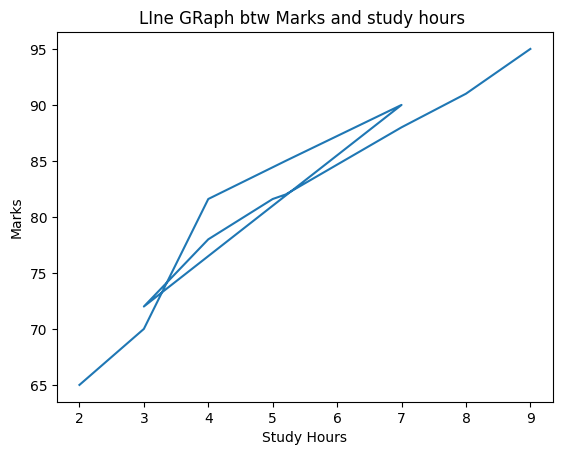

the Correlation btw marks and study hours is : 0.9616012285563805


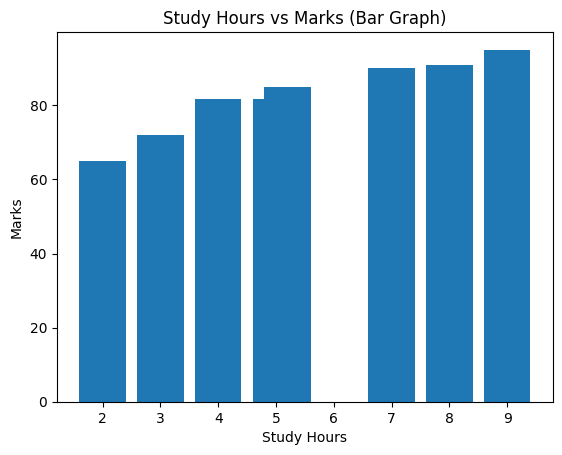


IQR Outliers:
 Empty DataFrame
Columns: [Student, Semester, Marks, Age, Height, Study_Hours]
Index: []

Z-score Outliers:
 Empty DataFrame
Columns: [Student, Semester, Marks, Age, Height, Study_Hours, Z_score_Marks]
Index: []


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


data = {
    "Student": ["A","B","C","D","E","F","G","H","I","J","K","L"],
    "Semester": [1,1,2,2,3,3,4,4,5,5,6,6],
    "Marks": [65,70,None,85,90,72,78,None,82,88,91,95],
    "Age": [18,19,18,None,19,20,21,22,21,None,23,24],
    "Height": [165,170,168,172,None,171,173,174,175,176,None,178],
    "Study_Hours": [2,3,4,None,7,3,4,5,None,7,8,9]
}


df = pd.DataFrame(data)
print("\nOriginal DataFrame (with None values):\n")
print(df)

df["Marks"].fillna(df["Marks"].mean(), inplace=True)
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Height"].fillna(df["Height"].mean(), inplace=True)
df["Study_Hours"].fillna(df["Study_Hours"].mean(),inplace=True)

print("\nDataFrame after filling None values:\n")
print(df)

plt.plot(df["Study_Hours"], df["Marks"])
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("LIne GRaph btw Marks and study hours ")
plt.show()

correlation = df["Marks"].corr(df["Study_Hours"])
print("the Correlation btw marks and study hours is " \
"" \
"" \
":", correlation)

plt.figure()
plt.bar(df["Study_Hours"], df["Marks"])
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Study Hours vs Marks (Bar Graph)")
plt.show()



Q1 = df["Marks"].quantile(0.25)
Q3 = df["Marks"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df["Marks"] < lower_bound) | (df["Marks"] > upper_bound)]
print("\nIQR Outliers:\n", iqr_outliers)

df["Z_score_Marks"] = stats.zscore(df["Marks"])
zscore_outliers = df[df["Z_score_Marks"].abs() > 3]
print("\nZ-score Outliers:\n", zscore_outliers)



